# Data Distribution

### Homework

Before you begin, remember to import the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

The following `cc` DataFrame comes from [this Kaggle dataset](https://www.kaggle.com/datasets/satvicoder/call-center-data?resource=download) and contains data coming from a Call Center. Have a look at the data itself as well as the column's data types. 

In [14]:
# Run this cell - do not delete it
cc = pd.read_csv("data/Call Center Data.csv")
cc.sample(5)

,Index,Incoming Calls,Answered Calls,Answer Rate,Abandoned Calls,Answer Speed (AVG),Talk Duration (AVG),Waiting Time (AVG),Service Level (20 Seconds)
88,89,36,35,97.22%,1,0:00:16,0:01:54,0:01:31,77.14%
389,390,31,28,90.32%,3,0:00:40,0:02:40,0:03:12,43.33%
997,998,152,120,78.95%,32,0:00:29,0:02:54,0:06:35,53.06%
209,210,164,161,98.17%,3,0:00:17,0:02:35,0:01:37,81.71%
86,87,144,140,97.22%,4,0:00:12,0:01:53,0:02:05,84.03%


In [15]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Index                       1251 non-null   int64 
 1   Incoming Calls              1251 non-null   int64 
 2   Answered Calls              1251 non-null   int64 
 3   Answer Rate                 1251 non-null   object
 4   Abandoned Calls             1251 non-null   int64 
 5   Answer Speed (AVG)          1251 non-null   object
 6   Talk Duration (AVG)         1251 non-null   object
 7   Waiting Time (AVG)          1251 non-null   object
 8   Service Level (20 Seconds)  1251 non-null   object
dtypes: int64(4), object(5)
memory usage: 88.1+ KB


1. As you can see, some of the columns such as `Answer Rate` and `Service Level (20 Seconds)` have % signs in them and are thus interpreted as strings. Convert them to numeric. 

In [16]:
cc["Answer Rate"] = cc["Answer Rate"].str.replace("%", "").astype("float")
cc["Service Level (20 Seconds)"] = cc["Service Level (20 Seconds)"].str.replace("%", "").astype("float")


2. The other issue is with the columns `Answer Speed (AVG)`, `Talk Duration (AVG)` and `Waiting Time (AVG)`. The cell below shows you how to convert the `Answer Speed (AVG)` string variable to a new column `Answer Speed (sec)` showing the same time information in seconds. Your task is to **create a function** that, given the following inputs, creates a new column in the DataFrame with the correct format in seconds: 
    1. `df`: DataFrame name 
    2. `old_col`: the existing column name in string format 
    3. `new_col`: new column name to be created in (sec) format 

In [21]:
# Run this cell - do not delete it
import datetime
import time
time_list = [time.strptime(el,'%H:%M:%S') for el in cc['Answer Speed (AVG)']]
cc['Answer Speed (sec)'] = [datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds() for x in time_list]
cc.head()

,Index,Incoming Calls,Answered Calls,Answer Rate,Abandoned Calls,Answer Speed (AVG),Talk Duration (AVG),Waiting Time (AVG),Service Level (20 Seconds),Answer Speed (sec)
0,1,217,204,94.01,13,0:00:17,0:02:14,0:02:45,76.28,17.0
1,2,200,182,91.00,18,0:00:20,0:02:22,0:06:55,72.73,20.0
2,3,216,198,91.67,18,0:00:18,0:02:38,0:03:50,74.30,18.0
3,4,155,145,93.55,10,0:00:15,0:02:29,0:03:12,79.61,15.0
4,5,37,37,100.00,0,0:00:03,0:02:06,0:00:35,97.30,3.0


In [19]:
def timestring_to_seconds (df, column_name, new_column_name):
	new_series = [time.strptime(el, "%H:%M:%S") for el in df[column_name]]
	df[new_column_name] = [datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds() for x in new_series]

3. Use the above formula to generate two new columns that will take as input the `Talk Duration (AVG)` and `Waiting Time (AVG)` variables and convert them to two new variables called `Talk Duration (sec)` and `Waiting Time (sec)`, having the correct data format in seconds (data type will be float). 

In [28]:
timestring_to_seconds(cc, "Waiting Time (AVG)", "Waiting Time (sec)")
timestring_to_seconds(cc, "Talk Duration (AVG)", "Talk Duration (sec)")
cc.head()

,Index,Incoming Calls,Answered Calls,Answer Rate,Abandoned Calls,Answer Speed (AVG),Talk Duration (AVG),Waiting Time (AVG),Service Level (20 Seconds),Answer Speed (sec),Waiting Time (sec),Talk Duration (sec)
0,1,217,204,94.01,13,0:00:17,0:02:14,0:02:45,76.28,17.0,165.0,134.0
1,2,200,182,91.00,18,0:00:20,0:02:22,0:06:55,72.73,20.0,415.0,142.0
2,3,216,198,91.67,18,0:00:18,0:02:38,0:03:50,74.30,18.0,230.0,158.0
3,4,155,145,93.55,10,0:00:15,0:02:29,0:03:12,79.61,15.0,192.0,149.0
4,5,37,37,100.00,0,0:00:03,0:02:06,0:00:35,97.30,3.0,35.0,126.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1246,1247,191,184,96.34,7,0:00:07,0:02:50,0:01:56,92.55,7.0,116.0,170.0
1247,1248,212,209,98.58,3,0:00:10,0:02:51,0:01:45,89.10,10.0,105.0,171.0
1248,1249,210,203,96.67,7,0:00:12,0:03:22,0:03:52,85.24,12.0,232.0,202.0
1249,1250,167,159,95.21,8,0:00:16,0:03:16,0:02:42,83.03,16.0,162.0,196.0


4. Explore the numeric data contained in the `cc` DataFrame. Choose a visualisation tool between box plot, histogram and density plot and, for the following three variables, visualise and describe their distribution by commenting on their first four moments (mean, standard deviation, skewness and kurtosis): 
    1. `Incoming Calls`
    2. `Talk Duration (sec)`
    3. `Answer Rate`

In [ ]:
cc.drop(columns="Index", inplace=True)

<Axes: xlabel='Answer Rate', ylabel='Count'>

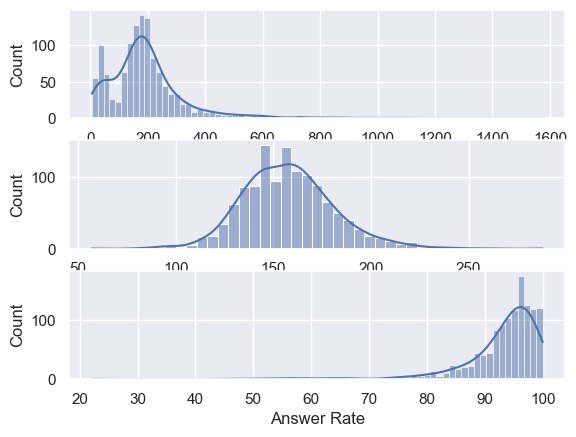

In [77]:
figures, axes = plt.subplots(3)

sns.histplot(data=cc, x="Incoming Calls", ax=axes[0], kde=True)
sns.histplot(data=cc, x="Talk Duration (sec)",  ax=axes[1], kde=True)
sns.histplot(data=cc, x="Answer Rate",  ax=axes[2], kde=True)

<Axes: xlabel='Incoming Calls', ylabel='Answer Rate'>

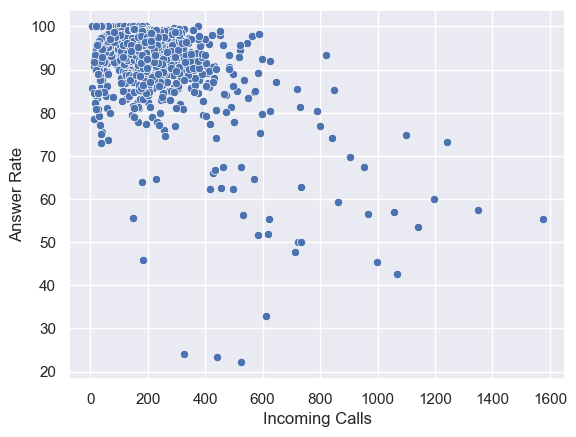

5. Use an appropriate plot to visualise the bivariate distribution of the `Waiting Time (sec)` and `Service Level (20 Seconds)` variables. What kind of relationship there is between these two variables? Why do you think that is? 